In [1]:
#importing all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#reading the dataset

df = pd.read_excel('/content/advertising_sales_data.xlsx')
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


In [3]:
#printing the dataset
df.tail()

,Campaign,TV,Radio,Newspaper,Sales
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5
199,camp200,232.1,8.6,8.7,18.4


In [4]:
#checking if the data has null values
df.isnull().sum()

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

In [5]:
#since there are only two null values in radio column it is better to drop those both column

df.dropna(subset=['Radio'],inplace=True)


In [6]:
df.drop(columns=['Campaign'],inplace=True)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


****

**1.	What is the average amount spent on TV advertising in the dataset?**

In [9]:
#calculate the average
print("The average amount spent on TV advertising in the dataset is - ")
df['TV'].sum()/len(df)

The average amount spent on TV advertising in the dataset is - 


146.78585858585862


**2.	What is the correlation between radio advertising expenditure and
product sales?**


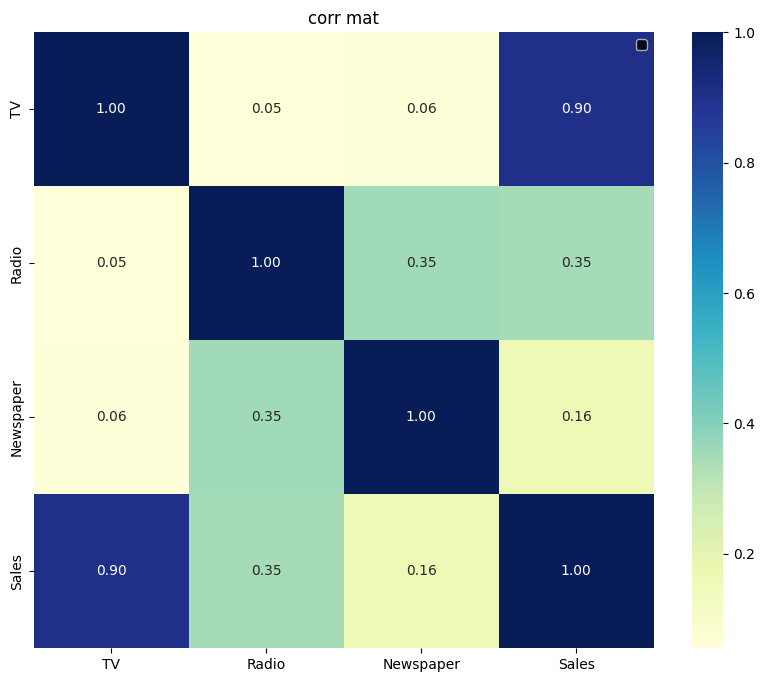

In [10]:
#plotting the correlation graph between radio advertising and product sales
numeric_df=df.select_dtypes(include=['float64','float64'])
corr_mat=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,cmap='YlGnBu',fmt=".2f")
plt.style.use("dark_background")


color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)
plt.legend()
plt.title("corr mat")
plt.show()

0.35 corr btw radio and sales which is a mod corr
:

**3.	Which advertising medium has the highest impact on sales based on the dataset?**

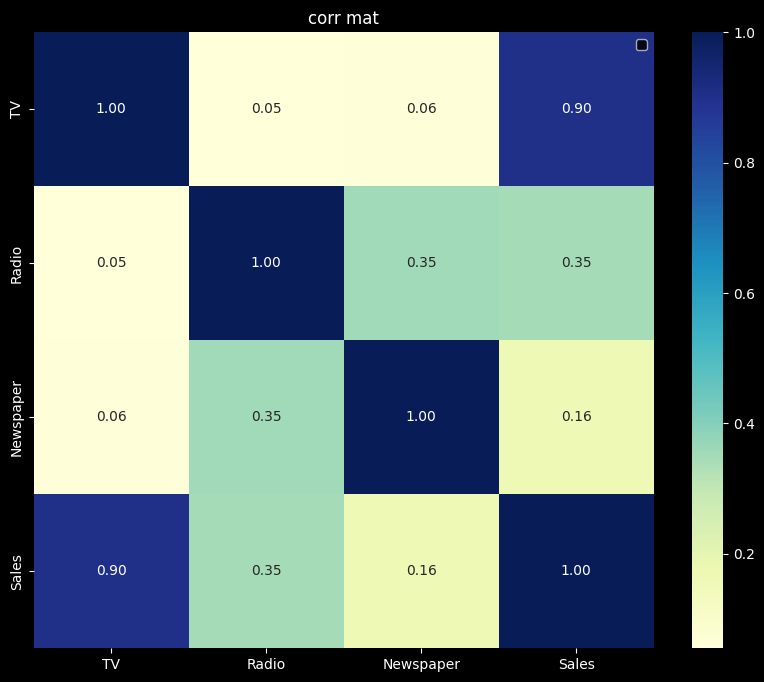

In [11]:
numeric_df=df.select_dtypes(include=['float64','float64'])
corr_mat=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,cmap='YlGnBu',fmt=".2f")
plt.style.use("dark_background")


color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)
plt.legend()
plt.title("corr mat")
plt.show()

there is a corr of 0.9 btw tv and sales so therefore tv AD has the highest impact on the sales

**4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.**

In [12]:
#splitting the variables
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [14]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state=1)

In [15]:
print(x_test.shape)

(40, 3)


In [16]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [17]:
#predicting the test set
y_pred = reg.predict(x_test)

In [18]:
print(y_pred)

[14.80965312 17.9645014  21.32476958  6.14418516 18.81723252 21.01934568
 16.01807849 15.63095273 23.92867614 21.68059668 22.400759   10.56874059
 19.22296216 17.7123527  10.99225163 15.27058964  6.98991612 24.3191647
 22.18485355 19.5723789  21.08707055 11.81602053 16.70282139 12.04947978
 10.02815168 12.49529636 21.34000036 10.05763393 14.73168333 21.40023897
 18.83112659  9.52102395  7.65521889 11.3798915   9.75308405 15.17111041
 22.83716655 20.27119054 11.79455896  7.25120581]


In [19]:
reg.score(x_train,y_train)


0.9050594173155051

In [20]:
reg.score(x_test,y_test)

0.8830289100914187

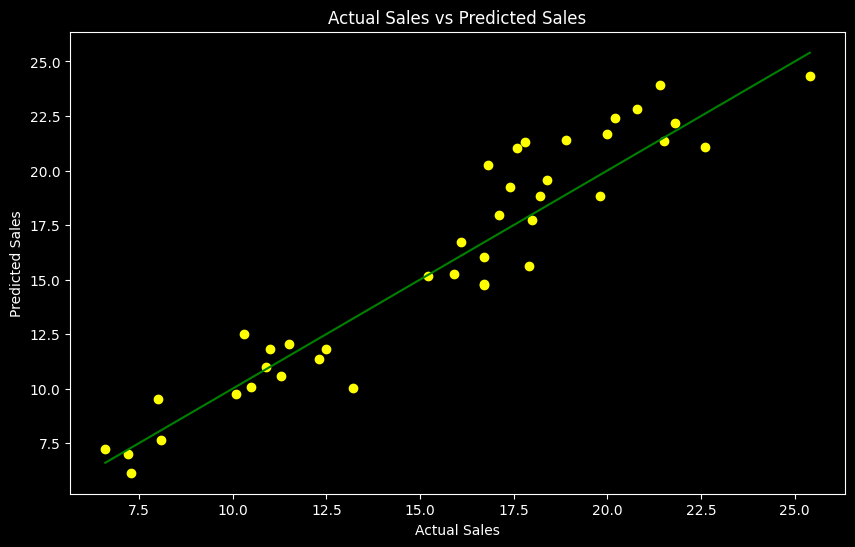

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred , c='yellow')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')
plt.style.use("dark_background")


color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)
plt.show()

**5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?**

In [22]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
new_sales_pred = reg.predict(new_data)
new_sales_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([19.93034664])

**6.	How does the performance of the linear regression model change when the dataset is normalized?**

In [23]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [24]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x)
y_norm = sc.fit_transform(y.reshape(-1,1))

In [26]:
from sklearn.model_selection import train_test_split
x_train_norm , x_test_norm  , y_train_norm , y_test_norm = train_test_split(x_norm , y_norm , test_size=0.2 , random_state=1)

In [27]:
print(y_train_norm)
print(y_train)

[[-1.85529828]
 [-0.59020514]
 [-0.3636213 ]
 [ 0.73153395]
 [-0.09927348]
 [ 0.54271408]
 [ 0.35389421]
 [ 0.27836626]
 [ 0.84482588]
 [ 0.86370786]
 [ 0.33501223]
 [ 1.05252773]
 [-1.42101257]
 [-0.60908713]
 [ 1.09029171]
 [ 2.09103702]
 [ 0.9581178 ]
 [ 0.61824203]
 [ 2.24209292]
 [ 0.71265197]
 [-0.85455296]
 [ 1.93998113]
 [ 0.5238321 ]
 [ 1.75116126]
 [-1.49654052]
 [ 1.95886312]
 [ 0.59936004]
 [-1.02449084]
 [-0.32585732]
 [ 1.61898735]
 [ 0.48606812]
 [ 1.05252773]
 [ 0.41054017]
 [ 0.39165819]
 [ 1.09029171]
 [-1.11890078]
 [-1.08113681]
 [-1.5343045 ]
 [ 0.07066441]
 [-2.25182001]
 [-0.2125654 ]
 [-0.72237905]
 [-0.47691322]
 [ 0.3727762 ]
 [-0.26921136]
 [-0.28809335]
 [ 0.24060229]
 [ 0.46718614]
 [-0.85455296]
 [ 0.39165819]
 [-0.08039149]
 [ 0.90147184]
 [ 0.41054017]
 [ 1.03364575]
 [ 0.86370786]
 [ 0.29724825]
 [-0.0615095 ]
 [ 0.88258985]
 [ 0.25948428]
 [-1.55318648]
 [-1.79865232]
 [ 0.8070619 ]
 [ 0.16507434]
 [-0.59020514]
 [-0.51467719]
 [-0.59020514]
 [-1.21331

In [28]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x_train_norm , y_train_norm)

LinearRegression()

In [29]:
y_pred_norm = reg1.predict(x_test_norm)

In [30]:
print(y_pred)
print(y_pred_norm)

[14.80965312 17.9645014  21.32476958  6.14418516 18.81723252 21.01934568
 16.01807849 15.63095273 23.92867614 21.68059668 22.400759   10.56874059
 19.22296216 17.7123527  10.99225163 15.27058964  6.98991612 24.3191647
 22.18485355 19.5723789  21.08707055 11.81602053 16.70282139 12.04947978
 10.02815168 12.49529636 21.34000036 10.05763393 14.73168333 21.40023897
 18.83112659  9.52102395  7.65521889 11.3798915   9.75308405 15.17111041
 22.83716655 20.27119054 11.79455896  7.25120581]
[[-0.0596868 ]
 [ 0.53601124]
 [ 1.17049665]
 [-1.69589934]
 [ 0.69702382]
 [ 1.11282654]
 [ 0.16848792]
 [ 0.09539088]
 [ 1.66216595]
 [ 1.23768387]
 [ 1.37366483]
 [-0.86045536]
 [ 0.77363364]
 [ 0.48840056]
 [-0.78048806]
 [ 0.02734717]
 [-1.53620853]
 [ 1.73589795]
 [ 1.33289759]
 [ 0.83961046]
 [ 1.12561435]
 [-0.62494412]
 [ 0.29778099]
 [-0.58086238]
 [-0.96252929]
 [-0.49668335]
 [ 1.17337252]
 [-0.95696245]
 [-0.07440905]
 [ 1.18474677]
 [ 0.6996473 ]
 [-1.05828508]
 [-1.41058615]
 [-0.70729395]
 [-

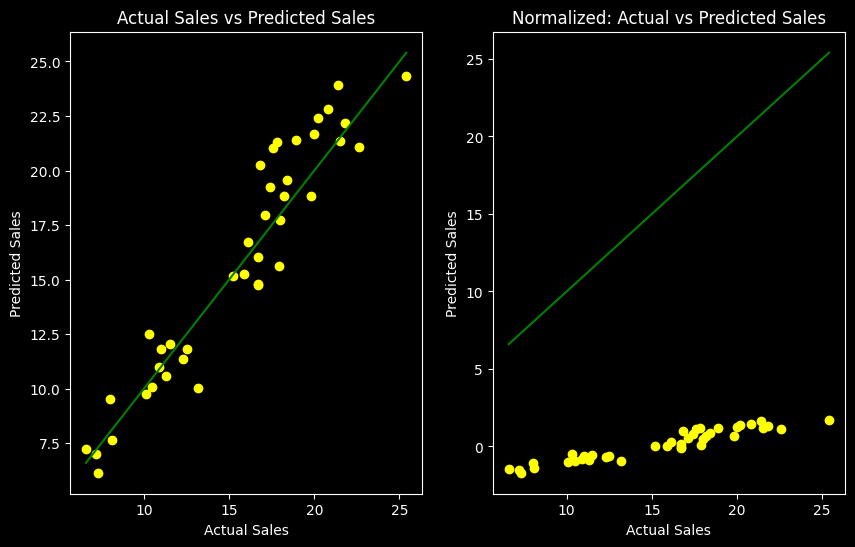

In [34]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)

plt.scatter(y_test, y_pred,c='yellow')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')
plt.style.use("dark_background")


color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)


# Plot for Normalized Data
plt.subplot(1,2,2)

plt.scatter(y_test, y_pred_norm, c='yellow')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Normalized: Actual vs Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')
plt.style.use("dark_background")


color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

plt.show()

**7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?**

In [ ]:
x_new = df[['Radio', 'Newspaper']]
y_new = df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_new , x_test_new  , y_train_new , y_test_new = train_test_split(x_new , y_new , test_size=0.2 , random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg.fit(x_train_new , y_train_new)

LinearRegression()

In [ ]:
y_pred_new = reg.predict(x_test_new)

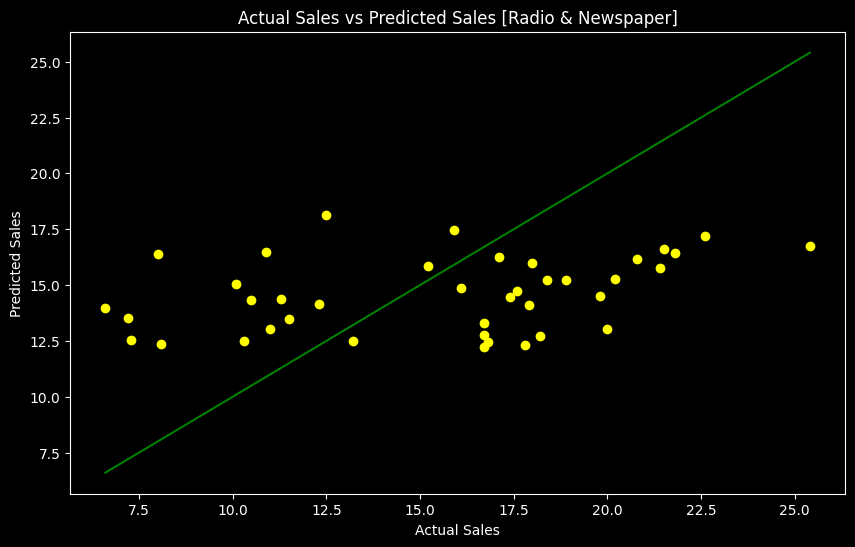

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_new, y_pred_new, c='yellow')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales [Radio & Newspaper]")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')
plt.style.use("dark_background")


color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)
plt.show()